In [71]:
#Data Processing
import numpy as np
import pandas as pd

#Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Notebook Cleanup
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as mtick

#Statistical Analysis
from statistics import NormalDist
from scipy import stats

In [72]:
#Pre COVID-19 datasets
pre_pri = pd.read_excel("data/pre_pri.xlsx", index_col = 0)
pre_sec = pd.read_excel("data/pre_sec.xlsx", index_col = 0)
pre_total = pd.read_excel("data/pre_total.xlsx", index_col = 0)
pre_home_alone = pd.read_excel("data/pre_home_alone.xlsx", index_col = 0)

#During COVID-19 datasets
dur_pri = pd.read_excel("data/dur_pri.xlsx", index_col = 0)
dur_sec = pd.read_excel("data/dur_sec.xlsx", index_col = 0)
dur_total = pd.read_excel("data/dur_total.xlsx", index_col = 0)
dur_home_alone = pd.read_excel("data/dur_home_alone.xlsx", index_col = 0)
dur_home_alone_ = pd.read_excel("data/dur_home_alone_.xlsx", index_col=0)

#Pre COVID-19 morning/afternoon/evening datasets
pre_pri_morn = pd.read_excel("data/pre_pri_morn.xlsx", index_col = 0)
pre_pri_aft = pd.read_excel("data/pre_pri_aft.xlsx", index_col = 0)
pre_pri_eve = pd.read_excel("data/pre_pri_eve.xlsx", index_col = 0)

#During COVID-19 morning/afternoon/evening datasets
dur_pri_morn = pd.read_excel("data/dur_pri_morn.xlsx", index_col = 0)
dur_pri_aft = pd.read_excel("data/dur_pri_aft.xlsx", index_col = 0)
dur_pri_eve = pd.read_excel("data/dur_pri_eve.xlsx", index_col = 0)

In [73]:
#Create DataFrames combining Pre and During
df_pri = pre_pri.append(dur_pri)
df_sec = pre_sec.append(dur_sec)
df_total = pre_total.append(dur_total)
df_home_alone = pre_home_alone.append(dur_home_alone)

In [74]:
#Pre COVID data with only patients who participated in both Pre and During
pre_pri_ = pre_pri.drop([2, 6, 12, 13, 15, 16, 18, 21, 24, 25, 26])
pre_sec_ = pre_sec.drop([2, 6, 12, 13, 15, 16, 18, 21, 24, 25, 26])
pre_total_ = pre_total.drop([2, 6, 12, 13, 15, 16, 18, 21, 24, 25, 26])
pre_home_alone_ = pre_home_alone.drop([2, 6, 12, 13, 15, 16, 18, 21, 24, 25, 26])

In [75]:
#Function to convert decimals into hours and minutes (HH:MM)
def convert(time):
    hours = int(time)
    minutes = (time*60) % 60
    return "%d:%02d" % (hours, minutes)

In [76]:
#Function to automatically label a vertical bar graph with their respective amount of time in hours and minutes on right
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(convert(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 3),
                    textcoords="offset points",
                    ha='left', va='bottom')

In [77]:
#Function to automatically label a vertical bar graph with their respective amount of time in hours and minutes in middle
def autolabel2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(convert(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

In [78]:
#Function to automatically label a horizontal bar graph with their respective amount of time in hours and minutes
def autolabelh(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(convert(width)),
                    xy=(rect.get_x() + rect.get_width(), rect.get_y() + rect.get_height()/2),
                    xytext=(2, 8),
                    textcoords="offset points",
                    ha='left', va='center')

In [79]:
#Function to calculate the difference in the 95% confidence interval (two sided)
def confidence_interval(data, confidence=0.975):
    dist = NormalDist.from_samples(data)
    t = stats.t.ppf(confidence, len(data)-1)
    h = dist.stdev * t / (len(data) ** .5)
    return ((dist.mean + h)-(dist.mean - h))/2

## Graphs

(0.0, 8.7)

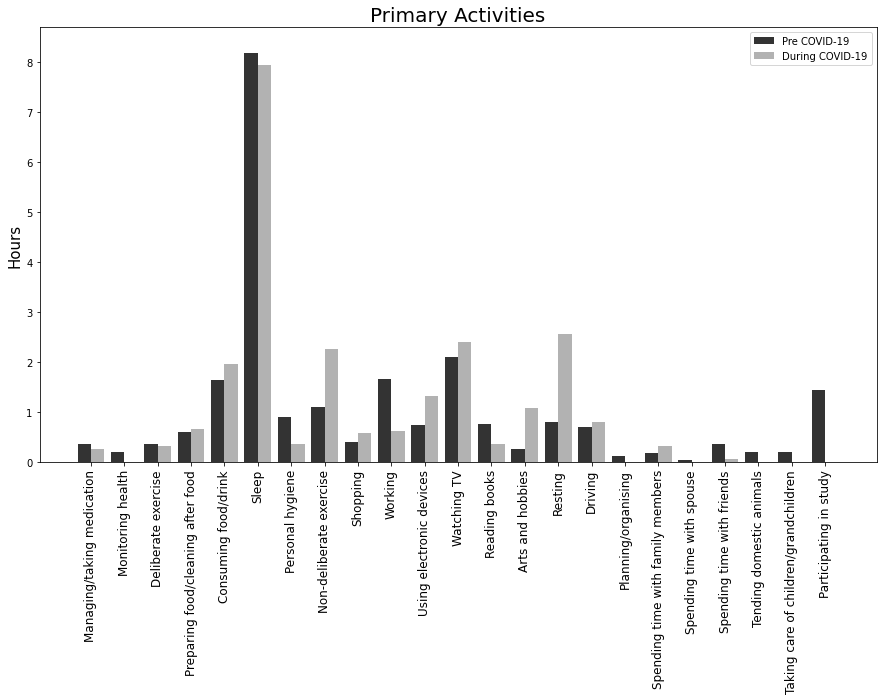

In [80]:
#Means of Primary Activities plot
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

prepri = ax.bar(x, pre_pri.mean()[:-1], width=bar_width, label='Pre COVID-19', color = 'black', alpha=0.8)
durpri = ax.bar(x+bar_width, dur_pri.mean()[:-1], width=bar_width, label='During COVID-19', color = 'black', alpha=0.3)

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Primary Activities', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 8.7)

(0.0, 8.7)

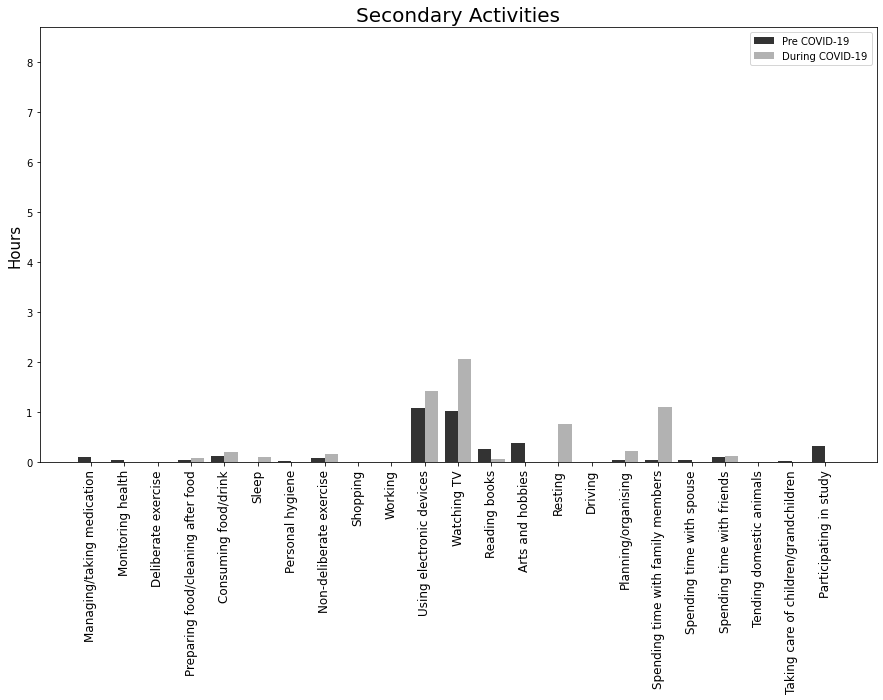

In [81]:
#Means of Secondary Activities plot
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

presec = ax.bar(x, pre_sec.mean()[:-1], width=bar_width, label='Pre COVID-19', color = 'black', alpha=0.8)
dursec = ax.bar(x+bar_width, dur_sec.mean()[:-1], width=bar_width, label='During COVID-19', color = 'black', alpha=0.3)

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Secondary Activities', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 8.7)

(0.0, 8.7)

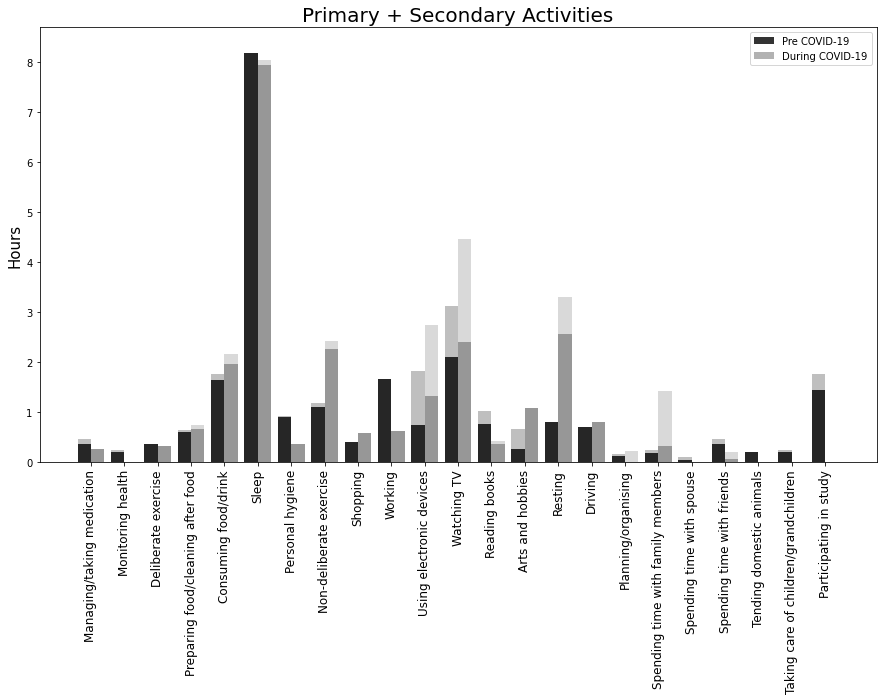

In [82]:
#Means of Total Activities plot
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

pretot = ax.bar(x, pre_total.mean()[:-1], width=bar_width, color = 'black', alpha = 0.25)
durtot = ax.bar(x+bar_width, dur_total.mean()[:-1], width=bar_width, color = 'black', alpha = 0.15)

prepri = ax.bar(x, pre_pri.mean()[:-1], width=bar_width, color = 'black', 
                label='Pre COVID-19', alpha=0.8)
durpri = ax.bar(x+bar_width, dur_pri.mean()[:-1], width=bar_width, color = 'black', 
                label='During COVID-19', alpha=0.3)

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Primary + Secondary Activities', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 8.7)

In [83]:
#Grouping columns
pre_g2_1 = pre_pri[pre_pri.columns[[1, 2]]].sum(axis=1)
pre_g2_2 = pre_pri[pre_pri.columns[[3, 8]]].sum(axis=1)
pre_g2_3 = pre_pri[pre_pri.columns[[1, 2, 8, 3]]].sum(axis=1)
pre_g2_4 = pre_pri[pre_pri.columns[[7, 6, 15, 1, 2, 3]]].sum(axis=1)
pre_g2_5 = pre_pri[pre_pri.columns[[4, 5]]].sum(axis=1)
pre_g2_6 = pre_pri[pre_pri.columns[[18, 19, 20, 21, 22]]].sum(axis=1)
pre_g2_7 = pre_pri[pre_pri.columns[[13, 14]]].sum(axis=1)
pre_g2_8 = pre_pri[pre_pri.columns[[12, 11]]].sum(axis=1)
pre_g2_9 = pre_pri[pre_pri.columns[[4, 8, 21, 17]]].sum(axis=1)
pre_g2_10 = pre_pri[pre_pri.columns[[16, 9]]].sum(axis=1)
pre_g2_11 = pre_pri[pre_pri.columns[[1, 2, 3]]].sum(axis=1)

dur_g2_1 = dur_pri[dur_pri.columns[[1, 2]]].sum(axis=1)
dur_g2_2 = dur_pri[dur_pri.columns[[3, 8]]].sum(axis=1)
dur_g2_3 = dur_pri[dur_pri.columns[[1, 2, 8, 3]]].sum(axis=1)
dur_g2_4 = dur_pri[dur_pri.columns[[7, 6, 15, 1, 2, 3]]].sum(axis=1)
dur_g2_5 = dur_pri[dur_pri.columns[[4, 5]]].sum(axis=1)
dur_g2_6 = dur_pri[dur_pri.columns[[18, 19, 20, 21, 22]]].sum(axis=1)
dur_g2_7 = dur_pri[dur_pri.columns[[13, 14]]].sum(axis=1)
dur_g2_8 = dur_pri[dur_pri.columns[[12, 11]]].sum(axis=1)
dur_g2_9 = dur_pri[dur_pri.columns[[4, 8, 21, 17]]].sum(axis=1)
dur_g2_10 = dur_pri[dur_pri.columns[[16, 9]]].sum(axis=1)
dur_g2_11 = dur_pri[dur_pri.columns[[1, 2, 3]]].sum(axis=1)

In [84]:
#Converting back to DataFrames
p2 = {'Health and Medication':pre_g2_1.values, 'Exercise':pre_g2_2.values, 'Health, Medication or Exercise':pre_g2_3.values, 
    'Self-Care':pre_g2_4.values, 'Food-Related':pre_g2_5.values, 'Time with People or Animals':pre_g2_6.values, 
    'Hobbies':pre_g2_7.values, 'Digital':pre_g2_8.values, 'Housebound Chores':pre_g2_9.values, 
    'Non-Housebound Chores':pre_g2_10.values, 'Health and Deliberate Exercise': pre_g2_11.values}
pre_g2 = pd.DataFrame(data=p2, index=pre_g2_1.index)

d2 = {'Health and Medication':dur_g2_1.values, 'Exercise':dur_g2_2.values, 'Health, Medication or Exercise':dur_g2_3.values, 
    'Self-Care':dur_g2_4.values, 'Food-Related':dur_g2_5.values, 'Time with People or Animals':dur_g2_6.values, 
    'Hobbies':dur_g2_7.values, 'Digital':dur_g2_8.values, 'Housebound Chores':dur_g2_9.values, 
    'Non-Housebound Chores':dur_g2_10.values, 'Health and Deliberate Exercise': dur_g2_11.values}
dur_g2 = pd.DataFrame(data=d2, index=dur_g2_1.index)

In [85]:
#Calculating confidence intervals (95%)
pci2=[]
dci2=[]
for i in range(0, len(pre_g2.columns)):
    pci2.append(confidence_interval(pre_g2[pre_g2.columns[i]]))
    dci2.append(confidence_interval(dur_g2[dur_g2.columns[i]]))

(0.0, 14.5)

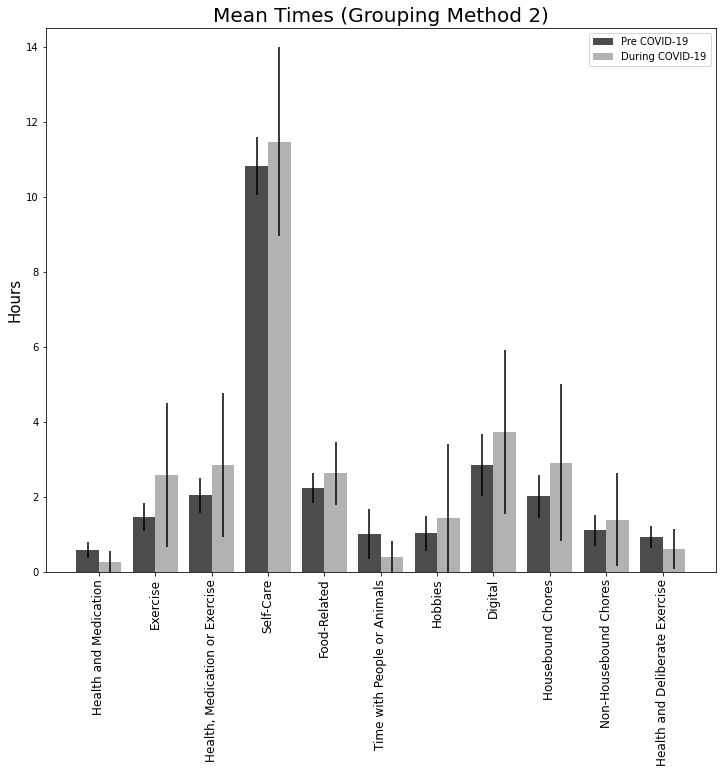

In [86]:
#Grouping method 2 plot
fig, ax = plt.subplots(figsize=(12, 10))
x=np.arange(len(pre_g2.mean().values))
bar_width = 0.4

pre2 = ax.bar(x, pre_g2.mean(), width=bar_width, color = 'black', label='Pre COVID-19', alpha=0.7, yerr=pci2)
dur2 = ax.bar(x+bar_width, dur_g2.mean(), width=bar_width, color = 'black', label='During COVID-19', alpha=0.3, yerr=dci2)

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_g2.columns, size=12, rotation=90)
ax.set_title('Mean Times (Grouping Method 2)', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 14.5)

In [87]:
#Grouping Columns
pre_g3_1 = pre_pri[pre_pri.columns[[1, 2, 5, 6, 7, 15]]].sum(axis=1)
pre_g3_2 = pre_pri[pre_pri.columns[[4, 8, 9, 10, 17, 21, 22]]].sum(axis=1)
pre_g3_3 = pre_pri[pre_pri.columns[[3, 11, 12, 13, 14, 18, 19, 20]]].sum(axis=1)
pre_g3_4 = pre_pri[pre_pri.columns[[16, 23, 24]]].sum(axis=1)

dur_g3_1 = dur_pri[dur_pri.columns[[1, 2, 5, 6, 7, 15]]].sum(axis=1)
dur_g3_2 = dur_pri[dur_pri.columns[[4, 8, 9, 10, 17, 21, 22]]].sum(axis=1)
dur_g3_3 = dur_pri[dur_pri.columns[[3, 11, 12, 13, 14, 18, 19, 20]]].sum(axis=1)
dur_g3_4 = dur_pri[dur_pri.columns[[16, 23, 24]]].sum(axis=1)

pre_g3_1_ = pre_pri_[pre_pri_.columns[[1, 2, 5, 6, 7, 15]]].sum(axis=1)
pre_g3_2_ = pre_pri_[pre_pri_.columns[[4, 8, 9, 10, 17, 21, 22]]].sum(axis=1)
pre_g3_3_ = pre_pri_[pre_pri_.columns[[3, 11, 12, 13, 14, 18, 19, 20]]].sum(axis=1)
pre_g3_4_ = pre_pri_[pre_pri_.columns[[16, 23, 24]]].sum(axis=1)

In [88]:
#Converting back to DataFrames
p3 = {'Reproductive Time':pre_g3_1.values, 'Productive Time':pre_g3_2.values, 
     'Recreative Time':pre_g3_3.values, 'Connection Time':pre_g3_4.values}
pre_g3 = pd.DataFrame(data=p3, index=pre_g3_1.index)

d3 = {'Reproductive Time':dur_g3_1.values, 'Productive Time':dur_g3_2.values, 
     'Recreative Time':dur_g3_3.values, 'Connection Time':dur_g3_4.values}
dur_g3 = pd.DataFrame(data=d3, index=dur_g3_1.index)

p3_ = {'Reproductive Time':pre_g3_1_.values, 'Productive Time':pre_g3_2_.values, 
     'Recreative Time':pre_g3_3_.values, 'Connection Time':pre_g3_4_.values}
pre_g3_ = pd.DataFrame(data=p3_, index=pre_g3_1_.index)

In [89]:
#Calculating confidence intervals (95%)
pci3=[]
dci3=[]
for i in range(0, len(pre_g3.columns)):
    pci3.append(confidence_interval(pre_g3[pre_g3.columns[i]]))
    dci3.append(confidence_interval(dur_g3[dur_g3.columns[i]]))

(0.0, 16.0)

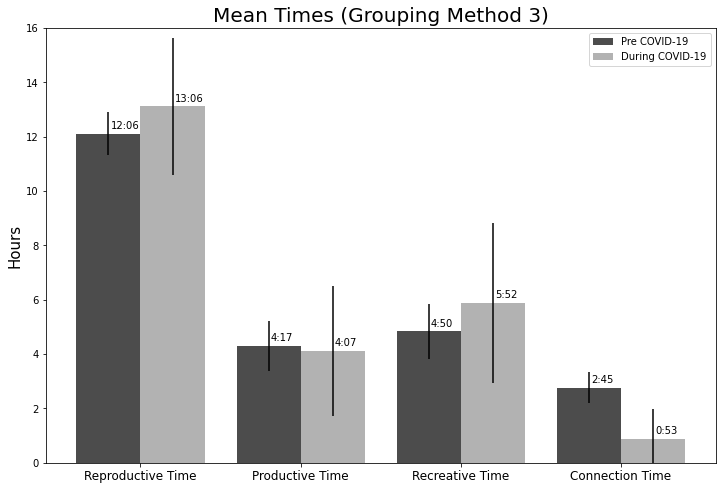

In [90]:
#Grouping method 3 plot
fig, ax = plt.subplots(figsize=(12, 8))
x=np.arange(len(pre_g3.mean().values))
bar_width = 0.4

pre3 = ax.bar(x, pre_g3.mean(), width=bar_width, color = 'black', label='Pre COVID-19', 
              alpha=0.7, yerr = pci3)
dur3 = ax.bar(x+bar_width, dur_g3.mean(), width=bar_width, color = 'black', label='During COVID-19', 
              alpha=0.3, yerr = dci3)

autolabel(pre3)
autolabel(dur3)

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_g3.columns, size=12)
ax.set_title('Mean Times (Grouping Method 3)', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 16)

In [108]:
#Sorting by descending order of 'Reproductive Time'
_p1 = pre_g3_1.sort_values()
_p2 = pre_g3_2.reindex(_p1.index)
_p3 = pre_g3_3.reindex(_p1.index)
_p4 = pre_g3_4.reindex(_p1.index)

_p1_ = pre_g3_1_.sort_values()
_p2_ = pre_g3_2_.reindex(_p1_.index)
_p3_ = pre_g3_3_.reindex(_p1_.index)
_p4_ = pre_g3_4_.reindex(_p1_.index)

_d1 = dur_g3_1.sort_values()
_d2 = dur_g3_2.reindex(_d1.index)
_d3 = dur_g3_3.reindex(_d1.index)
_d4 = dur_g3_4.reindex(_d1.index)

#Converting to numpy arrays to display on stacked bar chart
p1 = np.array(_p1)
p2 = np.array(_p2)
p3 = np.array(_p3)
p4 = np.array(_p4)

p1_ = np.array(_p1_)
p2_ = np.array(_p2_)
p3_ = np.array(_p3_)
p4_ = np.array(_p4_)

d1 = np.array(_d1)
d2 = np.array(_d2)
d3 = np.array(_d3)
d4 = np.array(_d4)

(0.0, 24.0)

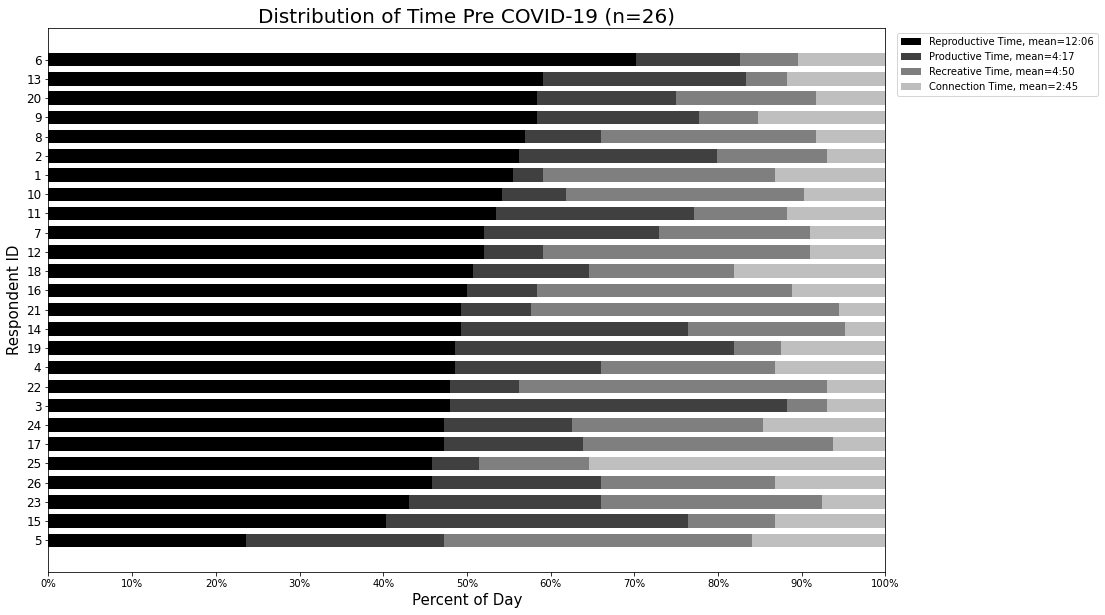

In [109]:
#Grouping method 3 plot Pre
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(len(p1))
y = np.arange(11)
width=0.7

plot1 = ax.barh(x, p1, width, color='black', label='Reproductive Time, mean={}'.format(convert(p1.mean())))
plot2 = ax.barh(x, p2, width, left=p1, color='black', label='Productive Time, mean={}'.format(convert(p2.mean())), alpha=0.75)
plot3 = ax.barh(x, p3, width, left=p1+p2, color='black', label='Recreative Time, mean={}'.format(convert(p3.mean())), alpha=0.5)
plot4 = ax.barh(x, p4, width, left=p1+p2+p3, color='black', label='Connection Time, mean={}'.format(convert(p4.mean())), alpha=0.25)

ax.set_yticks(x)
ax.set_yticklabels(_p1.index, size=12)
ax.set_title('Distribution of Time Pre COVID-19 (n=26)', size=20)
ax.set_ylabel('Respondent ID', size=15)
ax.set_xlabel('Percent of Day', size=15)
ax.set_xticks(y*2.4)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(24))
ax.legend(loc=1, bbox_to_anchor=(1.26, 1))
plt.xlim(0, 24)

(0.0, 24.0)

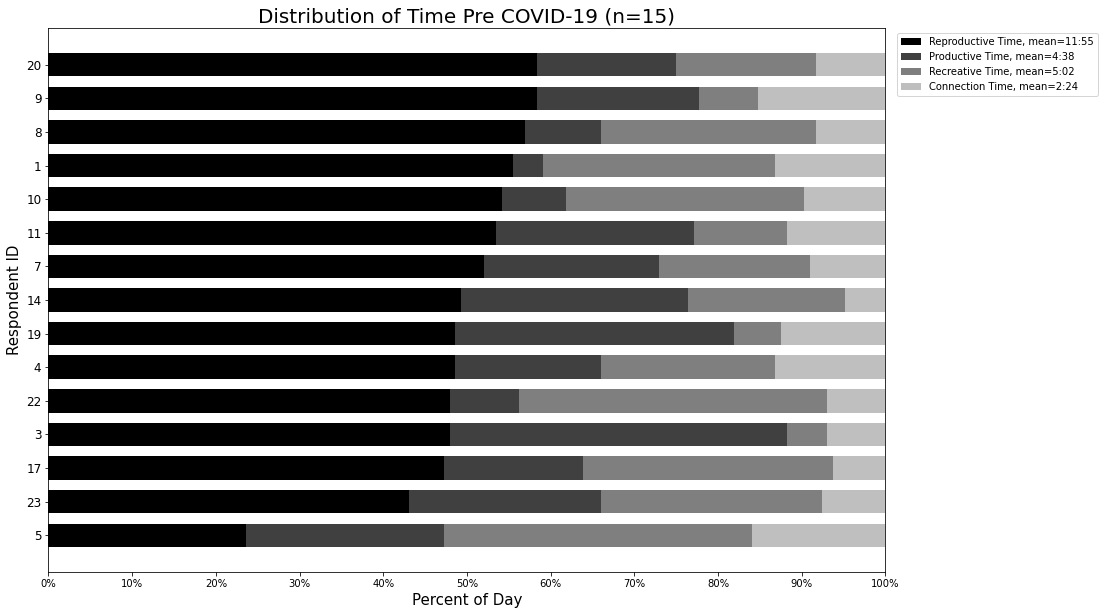

In [110]:
#Grouping method 3 plot Pre
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(len(p1_))
y = np.arange(11)
width=0.7

plot1 = ax.barh(x, p1_, width, color='black', label='Reproductive Time, mean={}'.format(convert(p1_.mean())))
plot2 = ax.barh(x, p2_, width, left=p1_, color='black', label='Productive Time, mean={}'.format(convert(p2_.mean())), alpha=0.75)
plot3 = ax.barh(x, p3_, width, left=p1_+p2_, color='black', label='Recreative Time, mean={}'.format(convert(p3_.mean())), alpha=0.5)
plot4 = ax.barh(x, p4_, width, left=p1_+p2_+p3_, color='black', label='Connection Time, mean={}'.format(convert(p4_.mean())), alpha=0.25)

ax.set_yticks(x)
ax.set_yticklabels(_p1_.index, size=12)
ax.set_title('Distribution of Time Pre COVID-19 (n=15)', size=20)
ax.set_ylabel('Respondent ID', size=15)
ax.set_xlabel('Percent of Day', size=15)
ax.set_xticks(y*2.4)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(24))
ax.legend(loc=1, bbox_to_anchor=(1.26, 1))
plt.xlim(0, 24)

(0.0, 24.0)

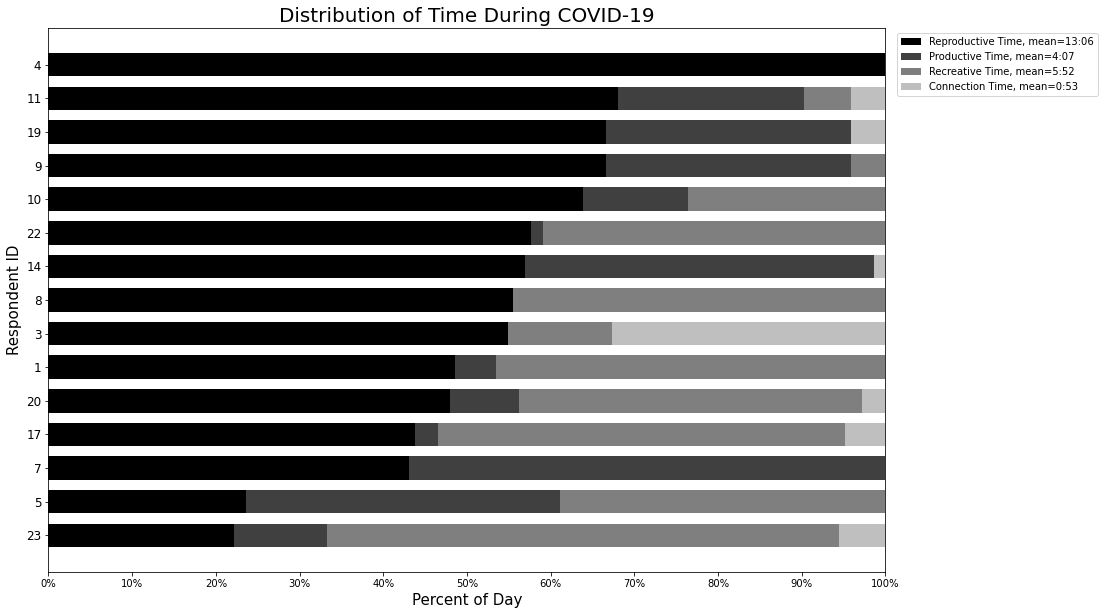

In [93]:
#Grouping method 3 plot During
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(len(d1))
y = np.arange(11)
width=0.7

plot1 = ax.barh(x, d1, width, color='black', label='Reproductive Time, mean={}'.format(convert(d1.mean())))
plot2 = ax.barh(x, d2, width, left=d1, color='black', label='Productive Time, mean={}'.format(convert(d2.mean())), alpha=0.75)
plot3 = ax.barh(x, d3, width, left=d1+d2, color='black', label='Recreative Time, mean={}'.format(convert(d3.mean())), alpha=0.5)
plot4 = ax.barh(x, d4, width, left=d1+d2+d3, color='black', label='Connection Time, mean={}'.format(convert(d4.mean())), alpha=0.25)

ax.set_yticks(x)
ax.set_yticklabels(_d1.index, size=12)
ax.set_title('Distribution of Time During COVID-19', size=20)
ax.set_ylabel('Respondent ID', size=15)
ax.set_xlabel('Percent of Day', size=15)
ax.set_xticks(y*2.4)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(24))
ax.legend(loc=1, bbox_to_anchor=(1.26, 1))
plt.xlim(0, 24)

In [94]:
_l1 = dur_home_alone_[dur_home_alone_.columns[0]].sort_values()
_l2 = dur_home_alone_[dur_home_alone_.columns[1]].reindex(_l1.index)
_l3 = dur_home_alone_[dur_home_alone_.columns[2]].reindex(_l1.index)
_l4 = dur_home_alone_[dur_home_alone_.columns[3]].reindex(_l1.index)
_l5 = dur_home_alone_[dur_home_alone_.columns[4]].reindex(_l1.index)

In [95]:
l1 = np.array(_l1)
l2 = np.array(_l2)
l3 = np.array(_l3)
l4 = np.array(_l4)
l5 = np.array(_l5)

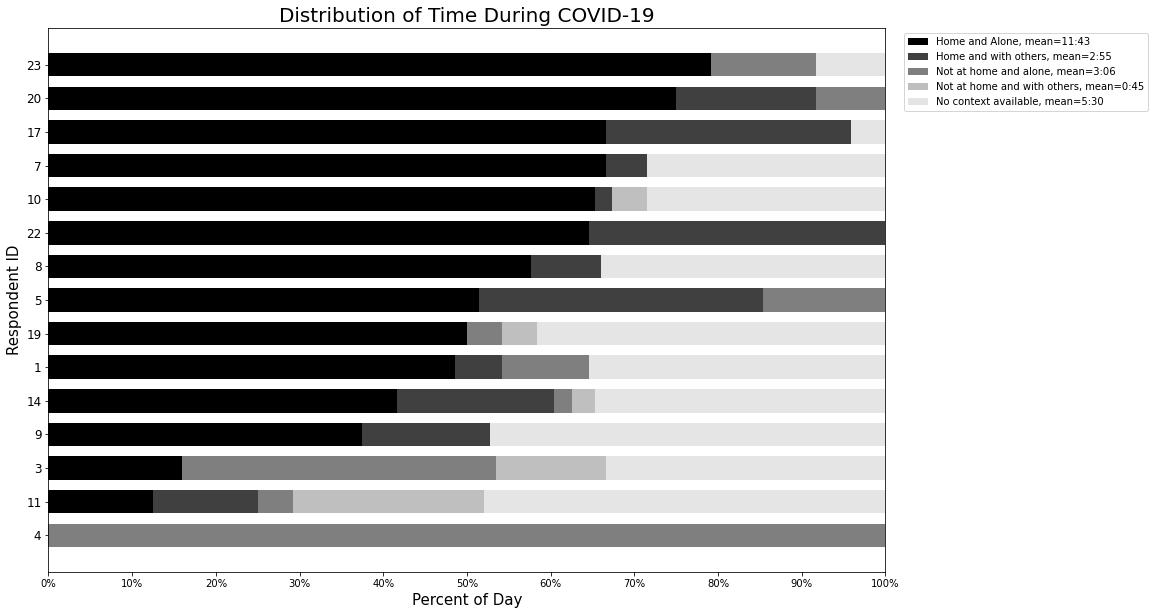

In [96]:
#Grouping method 3 plot During
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(len(d1))
y = np.arange(11)
width=0.7

plot1 = ax.barh(x, l1, width, color='black', label='Home and Alone, mean={}'.format(convert(l1.mean()/60)))
plot2 = ax.barh(x, l2, width, left=l1, color='black', label='Home and with others, mean={}'.format(convert(l2.mean()/60)), alpha=0.75)
plot3 = ax.barh(x, l3, width, left=l1+l2, color='black', label='Not at home and alone, mean={}'.format(convert(l3.mean()/60)), alpha=0.5)
plot4 = ax.barh(x, l4, width, left=l1+l2+l3, color='black', label='Not at home and with others, mean={}'.format(convert(l4.mean()/60)), alpha=0.25)
plot5 = ax.barh(x, l5, width, left=l1+l2+l3+l4, color='black', label='No context available, mean={}'.format(convert(l5.mean()/60)), alpha=0.1)

ax.set_yticks(x)
ax.set_yticklabels(_l1.index, size=12)
ax.set_title('Distribution of Time During COVID-19', size=20)
ax.set_ylabel('Respondent ID', size=15)
ax.set_xlabel('Percent of Day', size=15)
ax.set_xticks(y*2.4*60)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1440))
ax.legend(loc=1, bbox_to_anchor=(1.32, 1))

In [97]:
#Sort datasets in descending order
pre_means = pre_pri.mean().sort_values()
dur_means = dur_pri.mean().sort_values()

pre_means_morn = pre_pri_morn.mean().sort_values()
pre_means_aft = pre_pri_aft.mean().sort_values()
pre_means_eve = pre_pri_eve.mean().sort_values()

dur_means_morn = dur_pri_morn.mean().sort_values()
dur_means_aft = dur_pri_aft.mean().sort_values()
dur_means_eve = dur_pri_eve.mean().sort_values()

(0.0, 9.5)

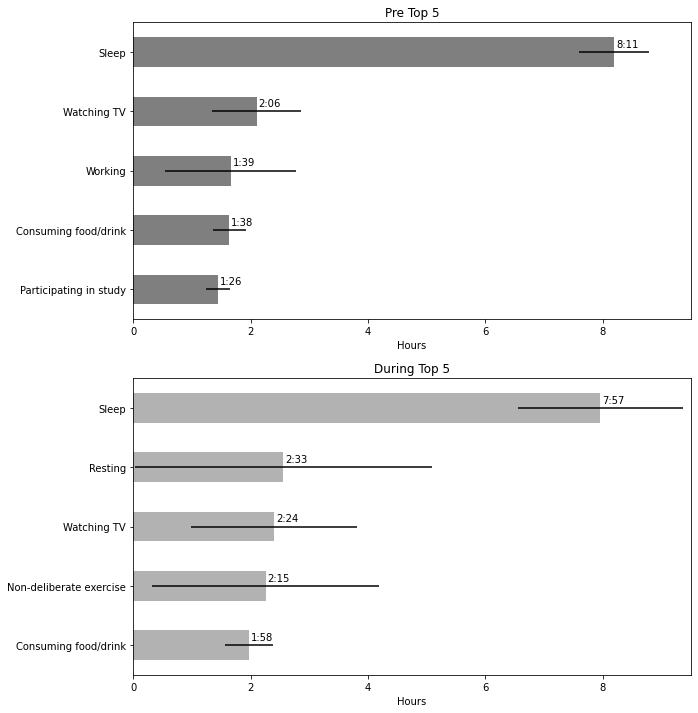

In [98]:
#Top 5 Overall
pci_o = []
for i in pre_means[-5:].index:
    pci_o.append(confidence_interval(pre_pri[i]))
    
dci_o = []
for i in dur_means[-5:].index:
    dci_o.append(confidence_interval(dur_pri[i]))

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
ax = pre_means[-5:].plot(kind='barh', color = 'black', xerr=pci_o, alpha=0.5)
ax.set_xlabel('Hours')
ax.set_title('Pre Top 5')
autolabelh(ax.patches)
plt.xlim(0, 9.5)

plt.subplot(2, 1, 2)
ax = dur_means[-5:].plot(kind='barh', color = 'black', xerr=dci_o, alpha=0.3)
ax.set_xlabel('Hours')
ax.set_title('During Top 5')
autolabelh(ax.patches)
plt.xlim(0, 9.5)

(0.0, 2.5)

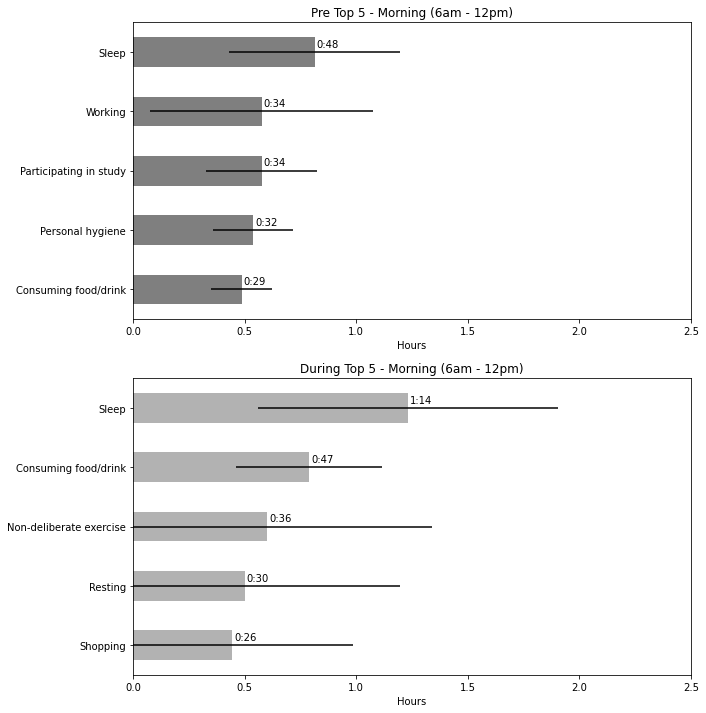

In [99]:
#Top 5 Mornings
pci_m = []
for i in pre_means_morn[-5:].index:
    pci_m.append(confidence_interval(pre_pri_morn[i]))
    
dci_m = []
for i in dur_means_morn[-5:].index:
    dci_m.append(confidence_interval(dur_pri_morn[i]))

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
ax = pre_means_morn[-5:].plot(kind='barh', color = 'black', xerr=pci_m, alpha=0.5)
ax.set_xlabel('Hours')
ax.set_title('Pre Top 5 - Morning (6am - 12pm)')
autolabelh(ax.patches)
plt.xlim(0, 2.5)

plt.subplot(2, 1, 2)
ax = dur_means_morn[-5:].plot(kind='barh', color = 'black', xerr=dci_m, alpha=0.3)
ax.set_xlabel('Hours')
ax.set_title('During Top 5 - Morning (6am - 12pm)')
autolabelh(ax.patches)
plt.xlim(0, 2.5)

(0.0, 2.5)

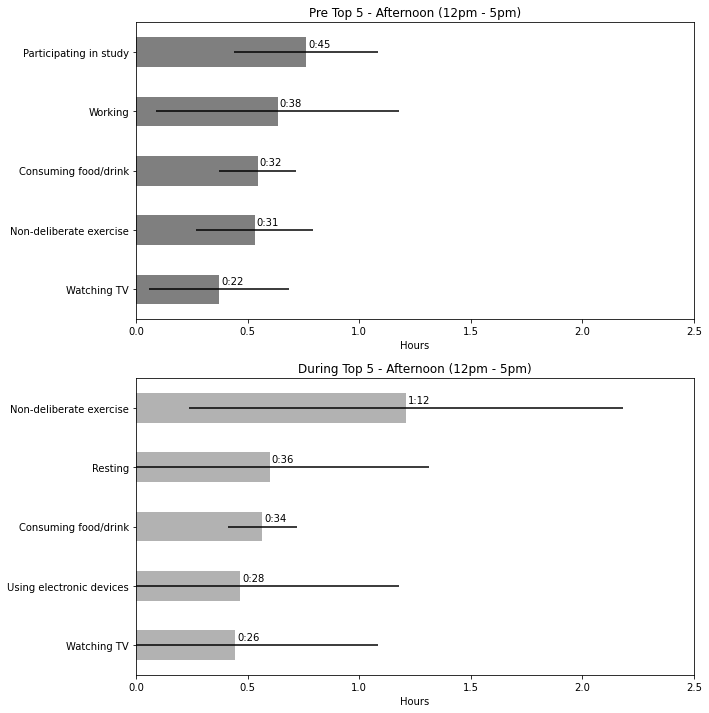

In [100]:
#Top 5 Afternoons
pci_a = []
for i in pre_means_aft[-5:].index:
    pci_a.append(confidence_interval(pre_pri_aft[i]))
    
dci_a = []
for i in dur_means_aft[-5:].index:
    dci_a.append(confidence_interval(dur_pri_aft[i]))

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
ax = pre_means_aft[-5:].plot(kind='barh', color = 'black', xerr=pci_a, alpha=0.5)
ax.set_xlabel('Hours')
ax.set_title('Pre Top 5 - Afternoon (12pm - 5pm)')
autolabelh(ax.patches)
plt.xlim(0, 2.5)

plt.subplot(2, 1, 2)
ax = dur_means_aft[-5:].plot(kind='barh', color = 'black', xerr=dci_a, alpha=0.3)
ax.set_xlabel('Hours')
ax.set_title('During Top 5 - Afternoon (12pm - 5pm)')
autolabelh(ax.patches)
plt.xlim(0, 2.5)

(0.0, 2.5)

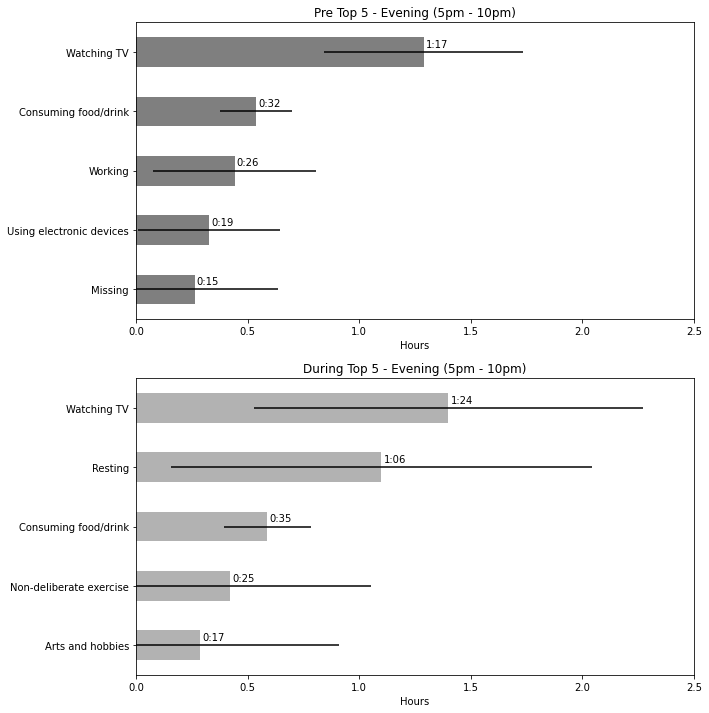

In [101]:
#Top 5 Evenings
pci_e = []
for i in pre_means_eve[-5:].index:
    pci_e.append(confidence_interval(pre_pri_eve[i]))
    
dci_e = []
for i in dur_means_eve[-5:].index:
    dci_e.append(confidence_interval(dur_pri_eve[i]))

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
ax = pre_means_eve[-5:].plot(kind='barh', color = 'black', xerr=pci_e, alpha=0.5)
ax.set_xlabel('Hours')
ax.set_title('Pre Top 5 - Evening (5pm - 10pm)')
autolabelh(ax.patches)
plt.xlim(0, 2.5)

plt.subplot(2, 1, 2)
ax = dur_means_eve[-5:].plot(kind='barh', color = 'black', xerr=dci_e, alpha=0.3)
ax.set_xlabel('Hours')
ax.set_title('During Top 5 - Evening (5pm - 10pm)')
autolabelh(ax.patches)
plt.xlim(0, 2.5)

In [102]:
pci_home = []
dci_home = []
for i in ['Home', 'Not Home', 'Missing_home']:
    pci_home.append(confidence_interval(pre_home_alone[i]))
    dci_home.append(confidence_interval(dur_home_alone[i]))

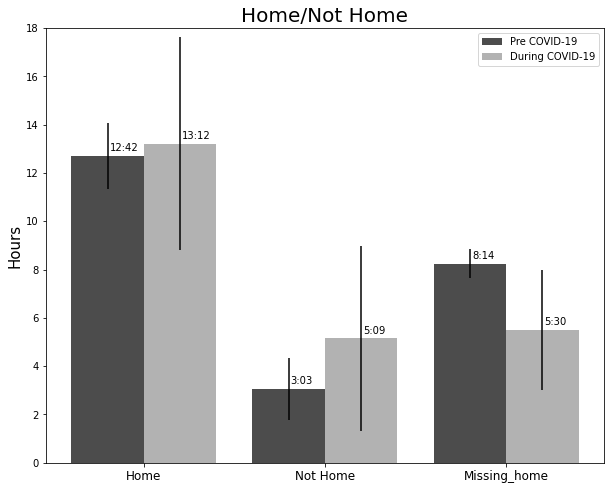

In [103]:
#Means of Home/Not Home
fig, ax = plt.subplots(figsize=(10, 8))
x=np.arange(3)
bar_width = 0.4

prehome = ax.bar(x, pre_home_alone.mean()[:3], width=bar_width, label='Pre COVID-19', color = 'black', yerr=pci_home, alpha=0.7)
durhome = ax.bar(x+bar_width, dur_home_alone.mean()[:3], width=bar_width, label='During COVID-19', color = 'black', yerr=dci_home, alpha=0.3)

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_home_alone.columns[1:], size=12)
ax.set_title('Home/Not Home', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 18)

autolabel(prehome)
autolabel(durhome)

In [104]:
pci_alone = []
dci_alone = []
for i in ['Alone', 'Not Alone', 'Missing_alone']:
    pci_alone.append(confidence_interval(pre_home_alone[i]))
    dci_alone.append(confidence_interval(dur_home_alone[i]))

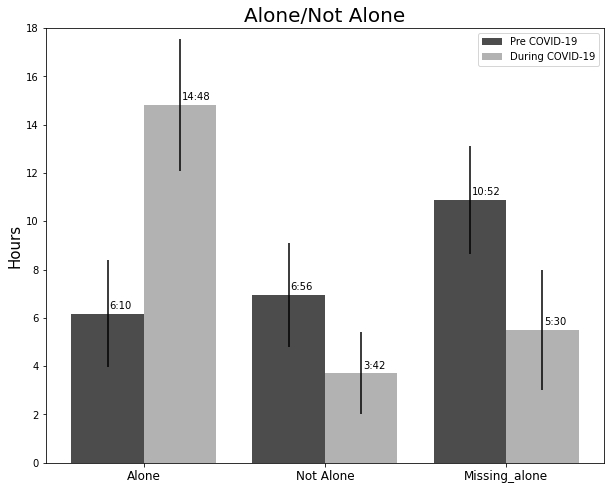

In [105]:
#Means of Alone/Not Alone
fig, ax = plt.subplots(figsize=(10, 8))
x=np.arange(3)
bar_width = 0.4

prealone = ax.bar(x, pre_home_alone.mean()[3:], width=bar_width, label='Pre COVID-19', color = 'black', yerr=pci_alone, alpha=0.7)
duralone = ax.bar(x+bar_width, dur_home_alone.mean()[3:], width=bar_width, label='During COVID-19', color = 'black', yerr=dci_alone, alpha=0.3)

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_home_alone.columns[4:], size=12)
ax.set_title('Alone/Not Alone', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 18)

autolabel(prealone)
autolabel(duralone)

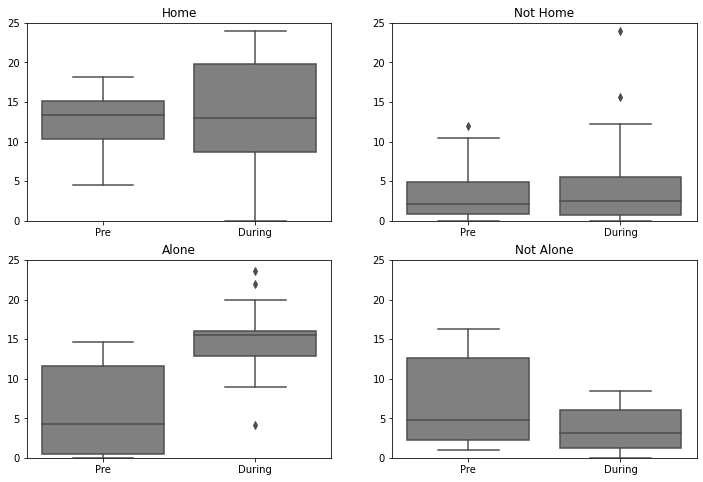

In [107]:
keys = ['Home', 'Not Home', 'Alone', 'Not Alone']

#Matrix of boxplots
plt.figure(figsize = (12, 8))
for i in range(0, len(keys)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = 'Period', y = df_home_alone[keys[i]], data = df_home_alone, color='grey')
    plt.title(keys[i])
    plt.xlabel('')
    plt.ylabel('')
    plt.ylim(0, 25)